In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

weather = pd.read_csv("weatherHistory.csv")

weather.head(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.


In [2]:
weather.rename(columns={"Temperature (C)": "temperature","Wind Speed (km/h)":"windspeed","Wind Bearing (degrees)":"windbearing","Pressure (millibars)":"pressure","Humidity":"humidity"}, inplace=True)

In [3]:
weather.head(1)

,Formatted Date,Summary,Precip Type,temperature,Apparent Temperature (C),humidity,windspeed,windbearing,Visibility (km),Loud Cover,pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.


In [4]:
weather1=weather[["temperature","humidity","windspeed","windbearing","pressure"]]
weather1.head(3)

,temperature,humidity,windspeed,windbearing,pressure
0,9.472,0.890,14.120,251.000,1015.130
1,9.356,0.860,14.265,259.000,1015.630
2,9.378,0.890,3.928,204.000,1015.940


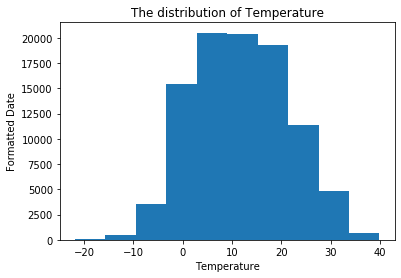

In [5]:
plt.hist(weather.temperature)
plt.title("The distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Formatted Date")
plt.show()

In [6]:
weather1["temperature"].isnull().values.any()

False

In [7]:
weather1["humidity"].isnull().values.any()

False

In [8]:
weather1["windspeed"].isnull().values.any()

False

In [9]:
weather1["windbearing"].isnull().values.any()

False

In [10]:
weather1["pressure"].isnull().values.any()

False

In [11]:
weather1.corr()

,temperature,humidity,windspeed,windbearing,pressure
temperature,1.000,-0.632,0.009,0.030,-0.005
humidity,-0.632,1.000,-0.225,0.001,0.005
windspeed,0.009,-0.225,1.000,0.104,-0.049
windbearing,0.030,0.001,0.104,1.000,-0.012
pressure,-0.005,0.005,-0.049,-0.012,1.000


In [12]:
# Y is the target variable
Y = weather1['temperature']
# X is the feature set which includes
# is_male and is_smoker variables
X = weather1[["humidity","windspeed","windbearing","pressure"]]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528533


In [13]:
# After estimating the parameters using OLS, we can state our model like that:
# temperature=37.9264+(-32.4962*humidity)+(-0.2014*windspeed)+(0.0040*windbearing)+(-0.0007*pressure)


Coefficients: 
 [-3.24962e+01 -2.01400e-01  4.00000e-03 -7.00000e-04]

Intercept: 
 37.92639999999992


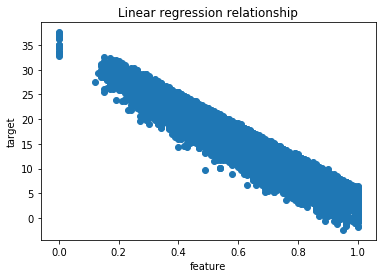

In [18]:
# this is our equation: temperature=37.9264+(-32.4962*humidity)+(-0.2014*windspeed)+(0.0040*windbearing)+(-0.0007*pressure)
weather1["temperature"] = 37.9264+(-32.4962*weather1["humidity"])+(-0.2014*weather1["windspeed"])+(0.0040*weather1["windbearing"])+(-0.0007*weather1["pressure"])
# we fit a linear regression where target is temperature
# and features are humidity","windspeed","windbearing","pressure"
lrm_example = linear_model.LinearRegression()
lrm_example.fit(weather1[["humidity","windspeed","windbearing","pressure"]],weather1["temperature"])
# predictions of the linear regression
predictions = lrm_example.predict(weather1[["humidity","windspeed","windbearing","pressure"]])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated temperature and X values
plt.scatter(weather1["humidity"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression relationship')
plt.show()

In [20]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the weather model is: {}".format(np.mean(errors)))

Mean of the errors in the weather model is: -0.017193390907830217


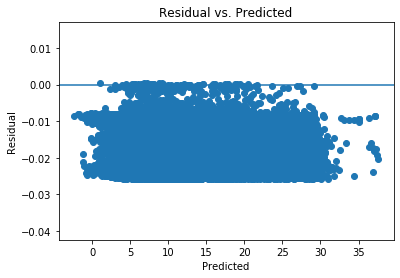

In [21]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [22]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 1.23022e+06 and p value is 0
Levene test statistic value is 142091 and p value is 0


In [23]:
weather1.corr()

,temperature,humidity,windspeed,windbearing,pressure
temperature,1.000,-0.975,0.014,0.045,-0.009
humidity,-0.975,1.000,-0.225,0.001,0.005
windspeed,0.014,-0.225,1.000,0.104,-0.049
windbearing,0.045,0.001,0.104,1.000,-0.012
pressure,-0.009,0.005,-0.049,-0.012,1.000


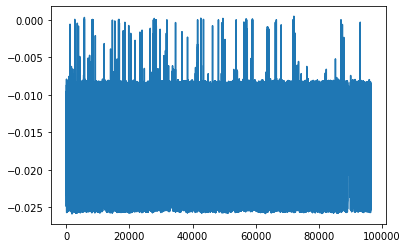

In [16]:
plt.plot(errors)
plt.show()

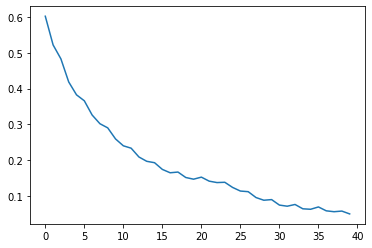

In [17]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

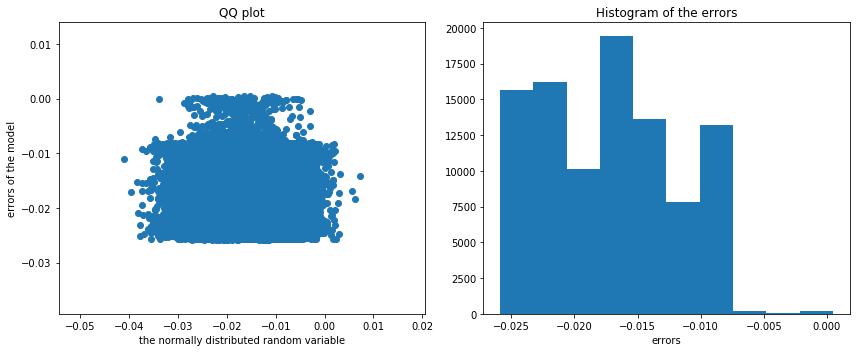

In [18]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [19]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [20]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 4483.896542989758 and p value is 0.0
Normality test statistics is 21228.500592023363 and p value is 0.0


In [ ]:
# We have built a regression model where the target variable is temperature. 
# And we used humidity, windspeed, windbearing and pressure as explanatory variables. Estimation of the model using OLS is above.
# After that we checked if our model meets the Gauss-Markov Conditions.
# Assumption one: there is not linearity of the model in the coefficients
# Assumption two: the expected value of the error is different than zero, so our model is biased.¶
# Assumption three: The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis
#                   which means our errors are heteroscedastic.¶
# Assumption four: when we examine correlation matrix we see low multicollinearity¶
# Assumption five: the autocorrelation between the errors of our model is indeed very low (ranging between -0.03 and 0.00).¶
# Assumption six: As can be seen in the charts above, our errors are not normally distributed. If they were, we would see a straight line
#                 going from the bottom-left to the upper-right of the QQ plot and a scattered plot shape in the histogram.¶